In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().mean()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

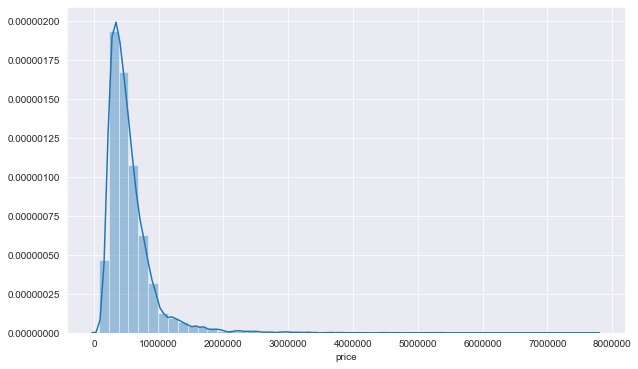

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

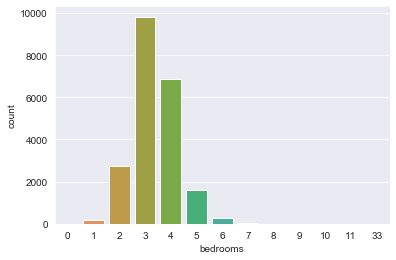

In [6]:
sns.countplot(df['bedrooms'])

In [7]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

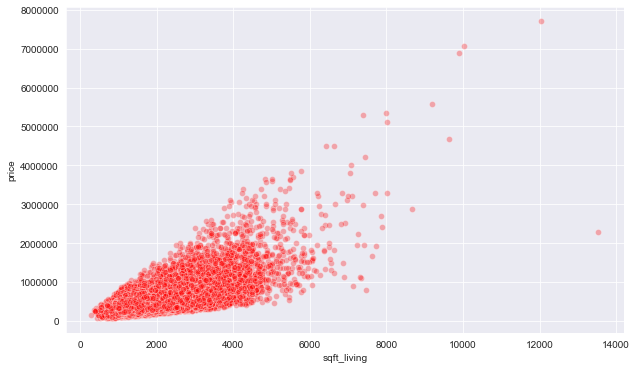

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'sqft_living', y = 'price', data = df, color = 'red', alpha = 0.3)

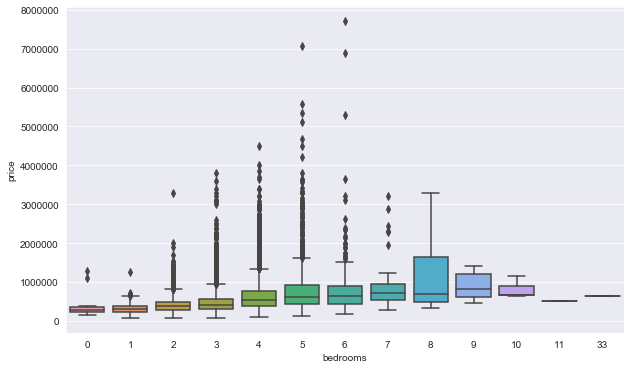

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

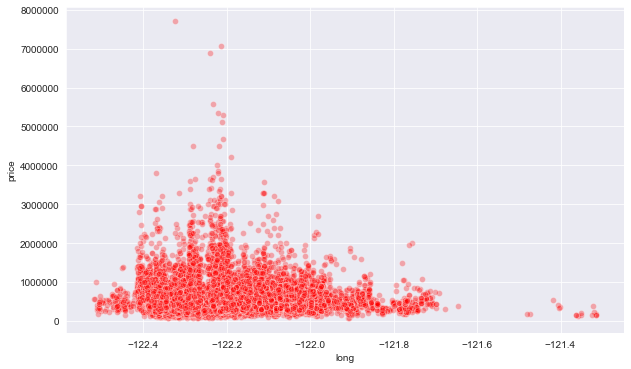

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'long', y = 'price', data = df, color = 'red', alpha = 0.3)

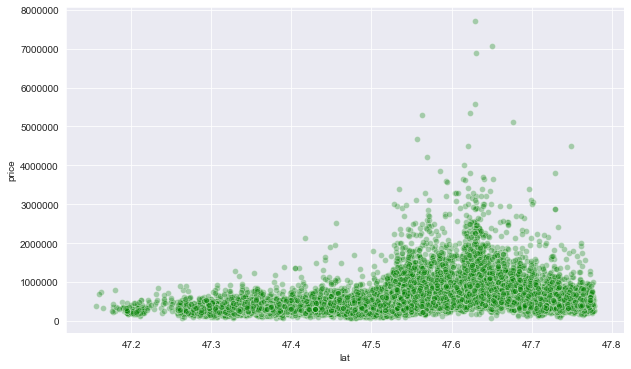

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'lat', y = 'price', data = df, color = 'green', alpha = 0.3)

In [12]:
len(df) * 0.01

216.13

In [13]:
bottom_99_perc = df.sort_values('price', ascending = False).iloc[216:]

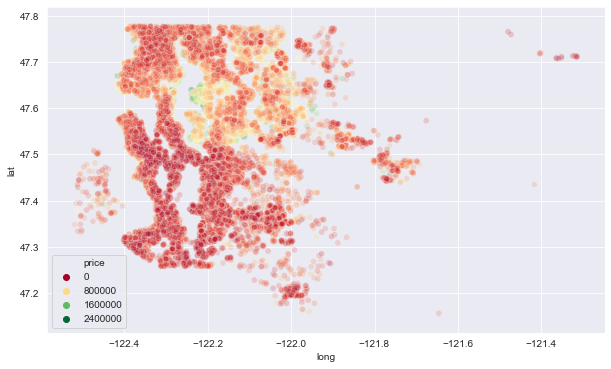

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'long', y = 'lat', data = bottom_99_perc, 
                alpha = 0.2, palette = 'RdYlGn', hue = 'price')

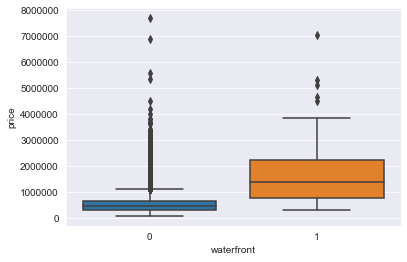

In [15]:
sns.boxplot(x = 'waterfront', y = 'price', data=df)

In [16]:
df.drop('id', axis = 1, inplace = True)

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df['date'][0].dayofweek

0

In [19]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df['day'] = df['date'].apply(lambda date: date.day)
df['day_of_week'] = df['date'].apply(lambda date: date.dayofweek)

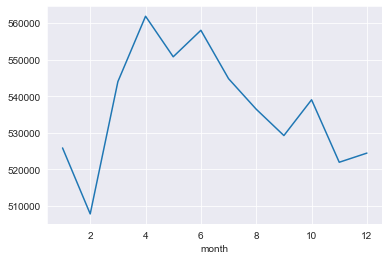

In [20]:
df.groupby('month').mean()['price'].plot()

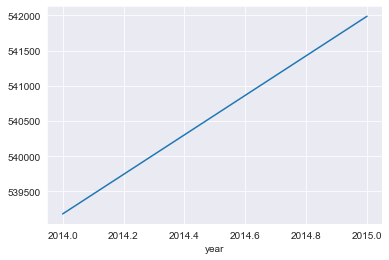

In [21]:
df.groupby('year').mean()['price'].plot()

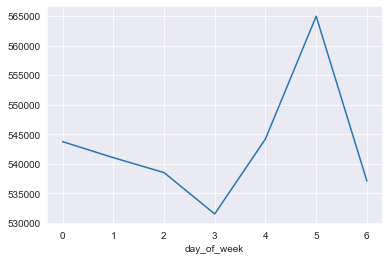

In [22]:
df.groupby('day_of_week').mean()['price'].plot()

In [23]:
df.drop('date', axis = 1, inplace = True)

In [24]:
df.drop('zipcode', axis = 1, inplace = True)

In [32]:
X = df.drop('price',axis = 1).values
y = df['price'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
X_train.shape

(14480, 21)

In [39]:
model = Sequential()
model.add(Dense(21, activation = 'relu'))
model.add(Dense(21, activation = 'relu'))
model.add(Dense(21, activation = 'relu'))
model.add(Dense(21, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [40]:
model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), batch_size = 128, epochs = 200)

Epoch 1/200
114/114 [==============================] - 1s 8ms/step - loss: 416585646080.0000 - val_loss: 446328832000.0000
Epoch 2/200
114/114 [==============================] - 1s 7ms/step - loss: 414266523648.0000 - val_loss: 437997109248.0000
Epoch 3/200
114/114 [==============================] - 1s 6ms/step - loss: 383094358016.0000 - val_loss: 366439989248.0000
Epoch 4/200
114/114 [==============================] - 1s 6ms/step - loss: 255162580992.0000 - val_loss: 186619133952.0000
Epoch 5/200
114/114 [==============================] - 1s 7ms/step - loss: 117409800192.0000 - val_loss: 118592462848.0000
Epoch 6/200
114/114 [==============================] - 1s 7ms/step - loss: 97906925568.0000 - val_loss: 115967598592.0000
Epoch 7/200
114/114 [==============================] - 1s 7ms/step - loss: 96152223744.0000 - val_loss: 113965441024.0000
Epoch 8/200
114/114 [==============================] - 1s 7ms/step - loss: 94466310144.0000 - val_loss: 112088653824.0000
Epoch 9/200
114/114

114/114 [==============================] - 1s 7ms/step - loss: 35738046464.0000 - val_loss: 43172872192.0000
Epoch 69/200
114/114 [==============================] - 1s 7ms/step - loss: 35625279488.0000 - val_loss: 43081351168.0000
Epoch 70/200
114/114 [==============================] - 1s 6ms/step - loss: 35500113920.0000 - val_loss: 42913325056.0000
Epoch 71/200
114/114 [==============================] - 1s 7ms/step - loss: 35400392704.0000 - val_loss: 42778484736.0000
Epoch 72/200
114/114 [==============================] - 1s 7ms/step - loss: 35275165696.0000 - val_loss: 42607517696.0000
Epoch 73/200
114/114 [==============================] - 1s 7ms/step - loss: 35154960384.0000 - val_loss: 42517176320.0000
Epoch 74/200
114/114 [==============================] - 1s 6ms/step - loss: 35018301440.0000 - val_loss: 42384019456.0000
Epoch 75/200
114/114 [==============================] - 1s 7ms/step - loss: 34921828352.0000 - val_loss: 42257874944.0000
Epoch 76/200
114/114 [===============

Epoch 135/200
114/114 [==============================] - 1s 7ms/step - loss: 30838935552.0000 - val_loss: 37516128256.0000
Epoch 136/200
114/114 [==============================] - 1s 6ms/step - loss: 30747080704.0000 - val_loss: 37475381248.0000
Epoch 137/200
114/114 [==============================] - 1s 7ms/step - loss: 30741512192.0000 - val_loss: 37454663680.0000
Epoch 138/200
114/114 [==============================] - 1s 6ms/step - loss: 30692329472.0000 - val_loss: 37416009728.0000
Epoch 139/200
114/114 [==============================] - 1s 6ms/step - loss: 30640916480.0000 - val_loss: 37359255552.0000
Epoch 140/200
114/114 [==============================] - 1s 6ms/step - loss: 30612887552.0000 - val_loss: 37311868928.0000
Epoch 141/200
114/114 [==============================] - 1s 6ms/step - loss: 30599299072.0000 - val_loss: 37290749952.0000
Epoch 142/200
114/114 [==============================] - 1s 6ms/step - loss: 30591723520.0000 - val_loss: 37251747840.0000
Epoch 143/200
11

In [41]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,4.165856e+11,4.463288e+11
1,4.142665e+11,4.379971e+11
2,3.830944e+11,3.664400e+11
3,2.551626e+11,1.866191e+11
4,1.174098e+11,1.185925e+11
...,...,...
195,2.913128e+10,3.553744e+10
196,2.913550e+10,3.553101e+10
197,2.909711e+10,3.548407e+10
198,2.907664e+10,3.549884e+10


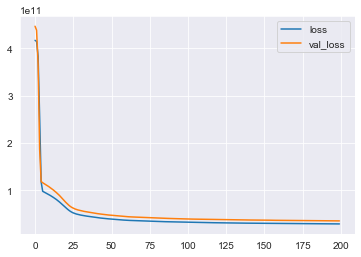

In [42]:
losses.plot()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [44]:
predictions = model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, predictions))

188239.97232471607

In [46]:
mean_absolute_error(y_test, predictions)

110342.79495829245

In [47]:
explained_variance_score(y_test, predictions)

0.7634299059147225

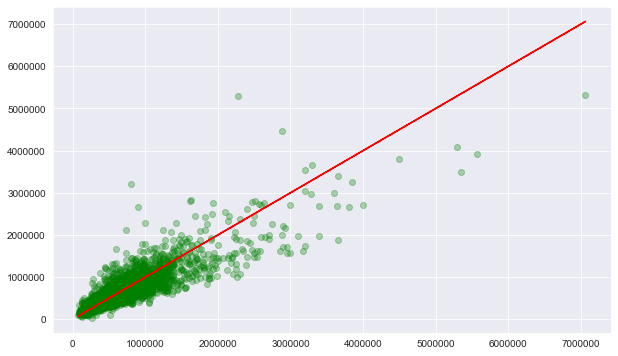

In [48]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, predictions, alpha = 0.3, color = 'g')
plt.plot(y_test, y_test, 'r')